In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# 可以試試這樣做 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist
X_train_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit=0.01) for x in X_train[:]]) # <--核心價值 change me
X_test_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit=0.01) for x in X_test[:]])   # <--核心價值 change me
print('Preprocessed by skimage.exposure')

Preprocessed by skimage.exposure
CPU times: user 6min 46s, sys: 5.21 s, total: 6min 51s
Wall time: 7min 1s


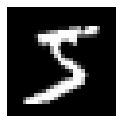

In [ ]:
# 劃出一 原來圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

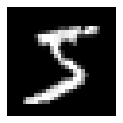

Data range after preprocessed 0.0 1.0


In [ ]:
# 劃出一圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train_skimage[0], cmap='gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train = X_train_skimage #<--------------preprocessed by skimage
X_test  = X_test_skimage  #<--------------preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  #< -----
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')    #< -----

x_Train_norm = X_train_2D # /255.0  #<-------取消
x_Test_norm = X_test_2D   # /255.0  #<-------取消

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=800, verbose=2)  

Epoch 1/10
60/60 - 1s - loss: 1.0328 - accuracy: 0.7641 - val_loss: 0.4191 - val_accuracy: 0.8913 - 1s/epoch - 24ms/step
Epoch 2/10
60/60 - 1s - loss: 0.3758 - accuracy: 0.8970 - val_loss: 0.3085 - val_accuracy: 0.9154 - 650ms/epoch - 11ms/step
Epoch 3/10
60/60 - 1s - loss: 0.3034 - accuracy: 0.9143 - val_loss: 0.2677 - val_accuracy: 0.9261 - 650ms/epoch - 11ms/step
Epoch 4/10
60/60 - 1s - loss: 0.2658 - accuracy: 0.9252 - val_loss: 0.2413 - val_accuracy: 0.9330 - 638ms/epoch - 11ms/step
Epoch 5/10
60/60 - 1s - loss: 0.2375 - accuracy: 0.9335 - val_loss: 0.2214 - val_accuracy: 0.9382 - 647ms/epoch - 11ms/step
Epoch 6/10
60/60 - 1s - loss: 0.2139 - accuracy: 0.9392 - val_loss: 0.2039 - val_accuracy: 0.9438 - 645ms/epoch - 11ms/step
Epoch 7/10
60/60 - 1s - loss: 0.1941 - accuracy: 0.9457 - val_loss: 0.1892 - val_accuracy: 0.9469 - 654ms/epoch - 11ms/step
Epoch 8/10
60/60 - 1s - loss: 0.1768 - accuracy: 0.9499 - val_loss: 0.1780 - val_accuracy: 0.9503 - 655ms/epoch - 11ms/step
Epoch 9/10


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9560

	[Info] Accuracy of testing data = 95.6%


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1461 - accuracy: 0.9592

	[Info] Accuracy of training data = 95.9%


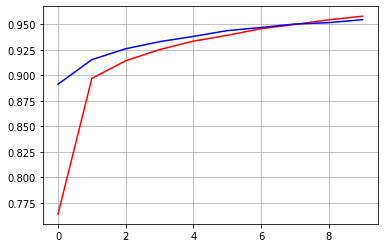

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

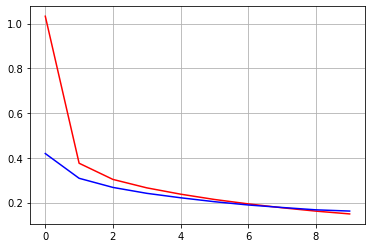

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()